##Predicting customer churn
Objectives: 


*   "Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]
*   Focus on recall  to minimize false negatives,  ensuring all cases of churn are correctly predicted 

About the dataset: 


*   Contains data of 5’986 customers including those who have left the company in the last month .


Features include attributes like:

*   Demography: Gender, Senior citizen, Married or single 
*   Relational: Length of tenure, kind of service subscribed for, paperless billing, payment method, type of contract(M/Y)
*   Behavioral: Streams movies, device protection 
*   Numeric: Monthly bill amount, total paid







##**Step1**: Import relevant libraries 

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
plt.style.use("seaborn")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as Imb_Pipe 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression



##**Step 2: Importing Data and performing EDA**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning DataSets/telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [16]:
churn=df['Churn'].value_counts().reset_index()
churn

,index,Churn
0,No,4399
1,Yes,1587


Observations: 
1. Unnamed:0 can be dropped as it is not need for predictive analysis
2. Customer ID can be dropped
3. Senior citizen is a binary classification but has a data type integer which should be converted to object so it is not mistaken for a discrete variable 
4. Total Charges data type has to be converted to float 
5. Classification feature-Churn should be converted to binary data type for ease of computing 
6. Data imbalance between churn=Yes and churn=no is of proportaion 3:1, this has to be converted to avoid bias in classification 

In [ ]:
def convert_to_float(x):
        try:
            return float(x)
        except ValueError:
            return 0

df["TotalCharges"] = df["TotalCharges"].apply(convert_to_float)
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == 1, 'Yes', 'No')


##**Step3: Data Visulization** 

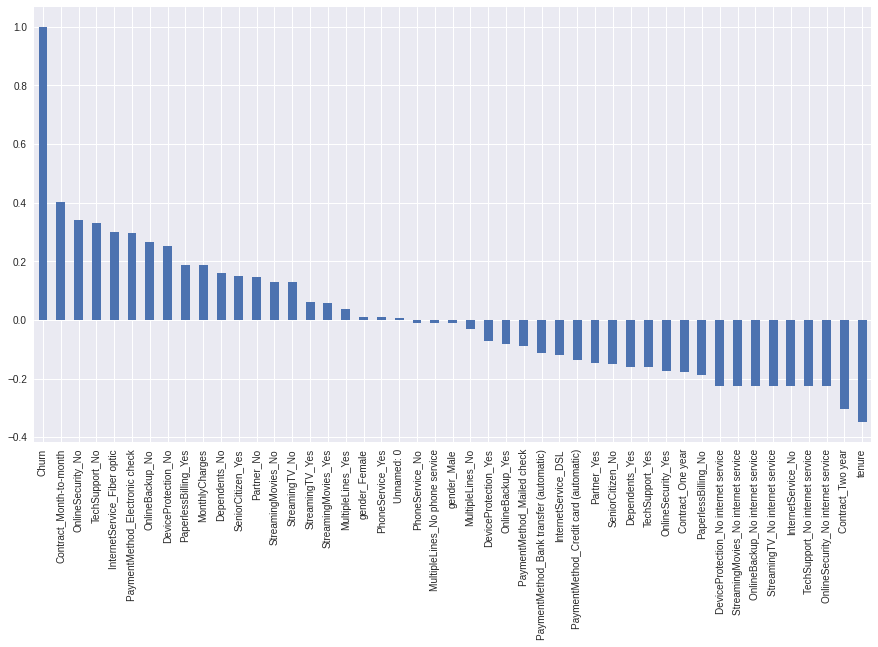

In [ ]:
#Visulizing correlation of other features with churn 
df2=df.drop(columns=['customerID', 'TotalCharges'])
df_d = pd.get_dummies(df2)

#plotting correlation
plt.figure(figsize=(15,8))
df_d.corr()['Churn'].sort_values(ascending = False).plot(kind='bar');

Text(0.5, 1.0, '% Senior Citizen')

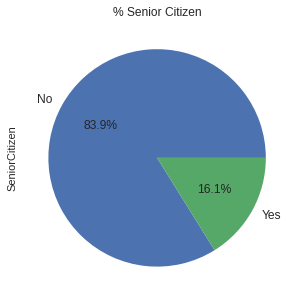

In [ ]:
#Visulizing distribution of senior citizen feature

ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('% Senior Citizen', fontsize = 12)

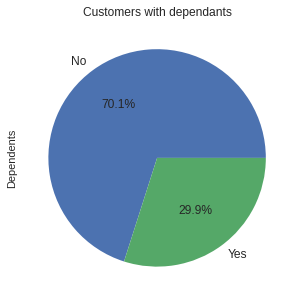

In [ ]:
#Visulization distribution of dependants feature

ax = (df['Dependents'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('Customers with dependants', fontsize = 12);

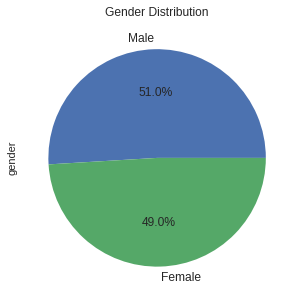

In [ ]:
#Visulizing distribution of gender feature

ax = (df['gender'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_title('Gender Distribution', fontsize = 12);

In [ ]:
#Visulizing tenure feature and its impact on churn 

#Preparing data
tenure= df.groupby('Churn').tenure.value_counts()
tenure=tenure.to_frame()
tenure.columns=['Numbers']
tenure=tenure.reset_index()
tenure=tenure.reset_index()

#Plotting tenure
fig = px.bar(tenure, x='tenure', y='Numbers', color='Churn', title="Monthly tenure distribution")
fig.update_layout( xaxis_title="Tenure in Months",yaxis_title="Number of customers")
fig.show()


In [ ]:
#Visulizing churn by monthly payment 

#Preparing dataframe 
monthly= df.groupby('Churn').MonthlyCharges.mean()
monthly=monthly.to_frame()
monthly=monthly.reset_index()

#plotting data
fig = px.bar(monthly, x='MonthlyCharges', color='Churn', title="Churn by Monthly Payment")
fig.update_layout( xaxis_title="Monthly Payment",yaxis_title="Churn")

fig.show()


In [ ]:
#Analyzing impact of churn on type of contract 

#Preparing data 
contract= df.groupby('Churn').Contract.value_counts()
contract=contract.to_frame()
contract.columns=['Numbers']
contract=contract.reset_index()

#Plotting graphs
fig = px.bar(contract, x='Contract', y='Numbers', color='Churn', title="Churn based on type of Contract")
fig.update_layout( xaxis_title="Type of contract",yaxis_title="Number of customers")
fig.show()


In [ ]:
#Visualizing Churn based on kind of internet service provided 

#preparing data
service= df.groupby('Churn').InternetService.value_counts()
service=service.to_frame()
service.columns=['Numbers']
service=service.reset_index()

#plotting 
fig = px.bar(service, x='InternetService', y='Numbers', color='Churn', title="Churn based on type of Internet Service")
fig.update_layout( xaxis_title="Internet Type",yaxis_title="Number of customers")
fig.show()


##**Step 3: Model Selection** 

##Auto ML with SKLearn for initial model selection 

In [ ]:
!pip install auto-sklearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 7.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 260 kB 45.0 MB/s 
     |████████████████████████████████| 4.9 MB 50.6 MB/s 
     |████████████████████████████████| 4.4 MB 55.6 MB/s 
     |████████████████████████████████| 24.9 MB 1.5 MB/s 
     |████████████████████████████████| 46 kB 3.8 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641945 sha256=5f8ff3278ada823b8299e31fd43b07856cab052c45a67f91ce20bc78f8387c34
  Stored in directory: /root/.cache/pip/wheels/c5/11/0e/aeac2cee929fa4388e528737b49deb2eea05486e6f80d61c1a
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7044 sha256=de003ba327d6e6c6640008dc787b96d63947a37c90ad8ffc8392fef1dad31deb
  Sto

In [ ]:
import sklearn


In [ ]:
!pip install --upgrade scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 33.8 MB 338 kB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.


In [ ]:
import sklearn


In [5]:
def clean_data(df):

    def convert_to_float(x):
        try:
            return float(x)
        except ValueError:
            return 0

    df["TotalCharges"] = df["TotalCharges"].apply(convert_to_float)
    df = df.drop(columns=["customerID", "Unnamed: 0"])
    cat_feat = df.select_dtypes(include=["object"]).columns
    for n in cat_feat:
        if df[n].unique().size == 2 and n != "gender":
            df[n] = df[n].apply(lambda x: 1 if x == "Yes" else 0)
    return df


In [ ]:
df=clean_data(df)

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn'].reset_index()
y.head()
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Male,0,1,1,72,1,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65
1,Female,0,0,0,44,1,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,1,Credit card (automatic),88.15,3973.20
2,Female,1,1,0,38,1,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Bank transfer (automatic),74.95,2869.85
3,Male,0,0,0,4,1,No,DSL,No,No,No,No,No,Yes,Month-to-month,1,Electronic check,55.90,238.50
4,Male,0,0,0,2,1,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,0,Electronic check,53.45,119.50


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((4788, 19), (1198, 19))

In [ ]:
import autosklearn.classification
import autosklearn.metrics

In [ ]:
automl = autosklearn.classification.AutoSklearnClassifier(
    time_left_for_this_task=300,
    per_run_time_limit=30,
    memory_limit=None,
    seed=1,
    resampling_strategy='holdout',
    resampling_strategy_arguments={
        'train_size': 0.8,
        'shuffle': True
    },
    metric=autosklearn.metrics.f1_weighted,
    scoring_functions=[autosklearn.metrics.f1_weighted, autosklearn.metrics.balanced_accuracy,
                       autosklearn.metrics.precision_weighted, autosklearn.metrics.recall_weighted],
    tmp_folder='./autosklearn_classification_example_out',
)

In [ ]:
automl.fit(X_train, y_train['Churn'].values,  dataset_name='telecom_users')

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning:

Input Column gender has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning:

Input Column MultipleLines has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning:

Input Column InternetService has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for your task.

/usr/local/lib/python3.8/dist-packages/autosklearn/data/feature_validator.py:318: UserWarning:

Input Column OnlineSecurity has generic type object. Autosklearn will treat this column as string. Please ensure that this setting is suitable for 

AutoSklearnClassifier(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                      memory_limit=None, metric=f1_weighted,
                      per_run_time_limit=30,
                      resampling_strategy_arguments={'shuffle': True,
                                                     'train_size': 0.8},
                      scoring_functions=[f1_weighted, balanced_accuracy,
                                         precision_weighted, recall_weighted],
                      time_left_for_this_task=300,
                      tmp_folder='./autosklearn_classification_example_out')

In [ ]:
def get_metric_result(cv_results):
    results = pd.DataFrame.from_dict(cv_results)
    results = results[results['status'] == "Success"]
    cols = ['rank_test_scores', 'param_classifier:__choice__', 'mean_test_score']
    return results[cols]


print("Metric results:")
print(get_metric_result(automl.cv_results_).to_string(index=False))

Metric results:
 rank_test_scores param_classifier:__choice__  mean_test_score
                1               random_forest         0.781821
                4           gradient_boosting         0.770636
                9               random_forest         0.694065
                3           gradient_boosting         0.775625
                2           gradient_boosting         0.776093
                5           gradient_boosting         0.764610
                7                         mlp         0.750487
                8                         sgd         0.747717
                6           gradient_boosting         0.757647
               10                  libsvm_svc         0.634714


##Model 1: Random Forest 

In [8]:
#f1 score
df_small = pd.read_csv("/content/drive/MyDrive/Machine Learning DataSets/telecom_users.csv")

df_small = clean_data(df_small)


ys = df_small["Churn"]

Xs = df_small[["InternetService", "Contract"]]

rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')


Xs_res, ys_res = rus.fit_resample(Xs, ys)
Xs_train, Xs_test, ys_train, ys_test = train_test_split(Xs_res, ys_res, test_size=0.2, random_state=42)

cat_features = Xs.select_dtypes(include='object').columns.to_list()
categorical_transformer = Pipeline(steps=[
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])
prep = ColumnTransformer(transformers=[
                                               
                                               ("cat", categorical_transformer, 
                                                       cat_features)
                                               ])


rf2 = RandomForestClassifier()
rf_pipe = Imb_Pipe(steps=[
    ("one_hot", prep),
    ('model', rf2)
    
])
param = {
        "model__max_depth" : [5],
        "model__max_features" : [0.5],
        "model__min_weight_fraction_leaf": [0.2],
        "model__random_state":[42],
        "model__n_jobs":[-1]
}

grid = GridSearchCV(estimator=rf_pipe, param_grid=param, scoring="f1", cv=5)
grid.fit(Xs_train, ys_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('one_hot',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['InternetService',
                                                                          'Contract'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [5], 'model__max_features': [0.5],
                         'model__min_weight_fraction_leaf': [0.2],
                         'model__n_jobs': [-1], 'model__random_state': [42]},
             scoring='f1')

In [9]:
best_mo = grid.best_estimator_
best_mo.fit(Xs_train, ys_train)
ys_pred = best_mo.predict(Xs_test)
rfs_report = classification_report(ys_test, ys_pred, output_dict=True)
rfs_report_small = pd.DataFrame.from_dict(rfs_report)

In [10]:
import time
import numpy as np
one_hot_feature = list(best_mo["one_hot"].transformers_[0][1].named_steps["onehot"].get_feature_names())
start_time = time.time()
importances = best_mo.named_steps["model"].feature_importances_
std = np.mean([tree.feature_importances_ for tree in best_mo.named_steps["model"].estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.022 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


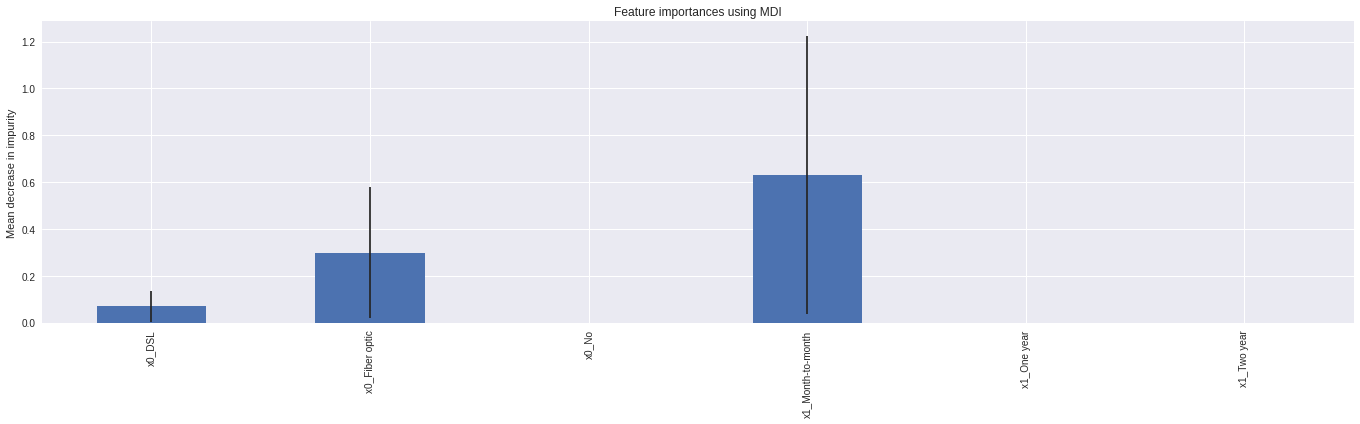

In [11]:
fig, ax = plt.subplots(figsize=(19,6))

forest_importances = pd.Series(importances, index=one_hot_feature)

forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [12]:
rfs_report_small

,0,1,accuracy,macro avg,weighted avg
precision,0.857143,0.636364,0.711811,0.746753,0.753881
recall,0.550296,0.895623,0.711811,0.722959,0.711811
f1-score,0.670270,0.744056,0.711811,0.707163,0.704781
support,338.000000,297.000000,0.711811,635.000000,635.000000


## Model 2: Logistic Regression

In [16]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [17]:
#Fixing data imbalance wiht random undersampler 

rus = RandomUnderSampler(random_state=42, sampling_strategy='majority')
X_res, y_res = rus.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((2539, 21), (635, 21))

In [18]:
#Train and test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
#Splitting categorical and numeric features for transformation 

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()


In [20]:
# setting up a pipeline for categorical features 

categorical_transformer = Pipeline(steps=[
                                           ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])
categorical_transformer

Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [21]:
#transforming numerical features in the pipeline with standard scaler 

numeric_transformer = Pipeline(steps=[
                                      ("scaler", StandardScaler())
                                      ])


In [22]:
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer,
                                                       numeric_features),
                                               ("cat", categorical_transformer,
                                                       categorical_features)
                                               ])

In [23]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model

LogisticRegression(random_state=42)

In [24]:
pipeline_lr = Pipeline(steps=[
                              ("pre_process", preprocessor),
                              ("model", lr_model)
                              ])

In [25]:
pipeline_lr.fit(X_train, y_train)
y_pred = pipeline_lr.predict(X_test)

class_labels = pipeline_lr.named_steps['model'].classes_

print(classification_report(y_test, y_pred))

pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=class_labels, index=class_labels)


              precision    recall  f1-score   support

          No       0.83      0.89      0.86       880
         Yes       0.63      0.51      0.56       318

    accuracy                           0.79      1198
   macro avg       0.73      0.70      0.71      1198
weighted avg       0.78      0.79      0.78      1198



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


,No,Yes
No,786,94
Yes,156,162


In [26]:
# Performing hyperparameter tunings with grid search 
from sklearn.model_selection import GridSearchCV

In [27]:
pipeline_lr.get_params().keys()
import warnings
warnings.filterwarnings('ignore')

In [28]:
parameters = [{'model__penalty' : ['l1','l2'], 
              'model__C': np.logspace(-3,3,7),
              'model__solver': ['newton-cg', 'lbfgs','liblinear']
}]
# Run the grid search
grid_obj = GridSearchCV(estimator=pipeline_lr, param_grid = parameters, cv=5, scoring = 'accuracy')
grid_obj.fit(X_train, y_train)

lr = grid_obj.best_estimator_

print(lr)


Pipeline(steps=[('pre_process',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Unnamed: 0',
                                                   'SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['customerID', 'gender',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
  

In [29]:
lr.fit(X_train, y_train)
y_pred_new = lr.predict(X_test)


In [30]:
print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

          No       0.83      0.91      0.87       880
         Yes       0.65      0.48      0.55       318

    accuracy                           0.79      1198
   macro avg       0.74      0.69      0.71      1198
weighted avg       0.78      0.79      0.78      1198



Parameter tuning has seen a marginal improvement in scores. Looks like the random forest model has the performance. 